<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/StudentGradePredictionCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import io
from google.colab import files

In [3]:
data_to_load_students = files.upload()
std = pd.read_csv(io.BytesIO(data_to_load_students['DataCoursework2.csv']))
std.head(5)

std = std.drop(['ID','Week2_Quiz1','Week3_MP1','Week3_PR1','Week5_MP2','Week5_PR2','Week7_MP3','Week7_PR3','Week4_Quiz2','Week6_Quiz3','Week8_Total'],axis=1)


Saving DataCoursework2.csv to DataCoursework2 (5).csv


In [4]:
std['OverallStat0'] = std['Week1_Stat0'] + std['Week2_Stat0'] + std['Week3_Stat0'] + std['Week4_Stat0'] + std['Week5_Stat0'] + std['Week6_Stat0'] + std['Week7_Stat0']  + std['Week8_Stat0'] + std['Week9_Stat0']
std['OverallStat1'] = std['Week1_Stat1'] + std['Week2_Stat1'] + std['Week3_Stat1'] + std['Week4_Stat1'] + std['Week5_Stat1'] + std['Week6_Stat1'] + std['Week7_Stat1']  + std['Week8_Stat1'] + std['Week9_Stat1']
std['OverallStat2'] = std['Week1_Stat2'] + std['Week2_Stat2'] + std['Week3_Stat2'] + std['Week4_Stat2'] + std['Week5_Stat2'] + std['Week6_Stat2'] + std['Week7_Stat2']  + std['Week8_Stat2'] + std['Week9_Stat2']
std['OverallStat3'] = std['Week1_Stat3'] + std['Week2_Stat3'] + std['Week3_Stat3'] + std['Week4_Stat3'] + std['Week5_Stat3'] + std['Week6_Stat3'] + std['Week7_Stat3']  + std['Week8_Stat3'] + std['Week9_Stat3']

std.head(5)

,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,OverallStat0,OverallStat1,OverallStat2,OverallStat3
0,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,118,119,8,4
1,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,465,85,17,37
2,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3,169,65,8,9
3,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3,553,74,17,15
4,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2,149,62,7,17


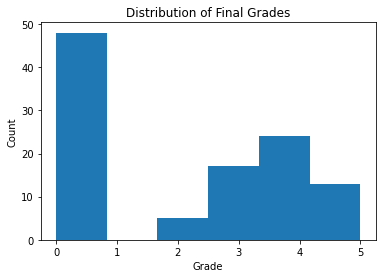

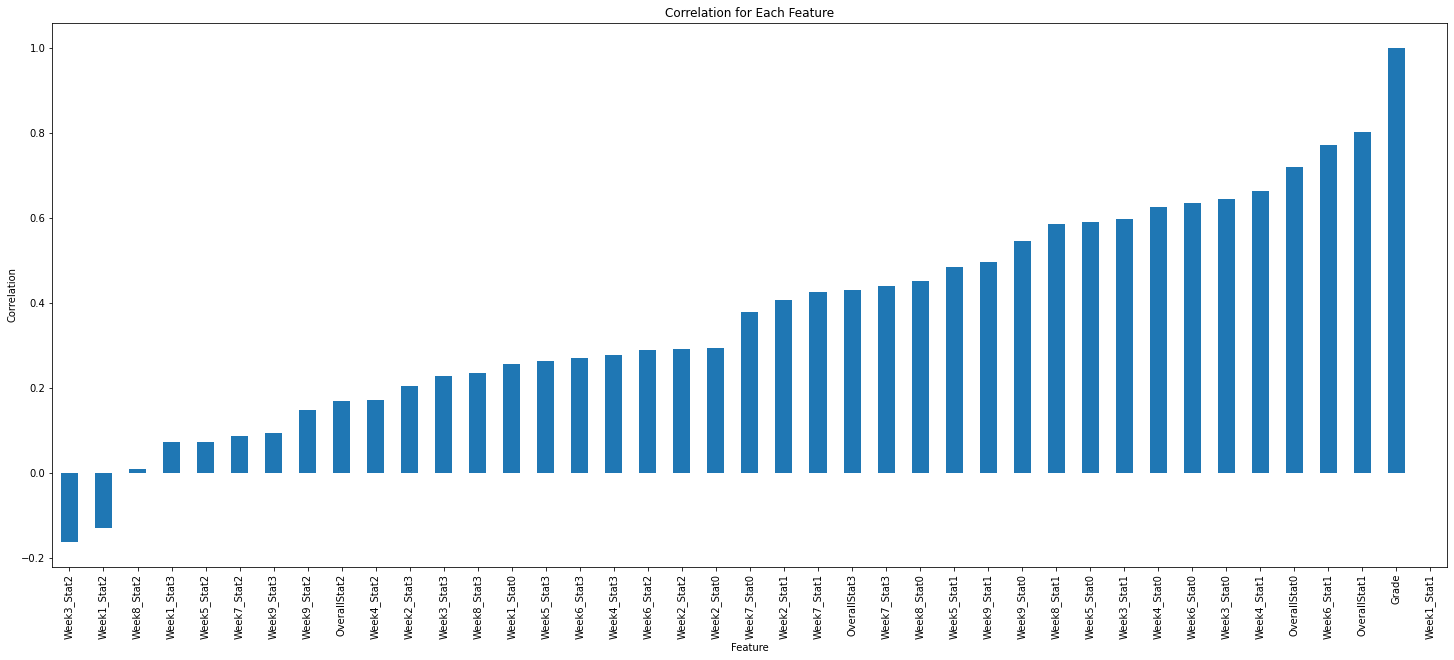

In [5]:
import matplotlib.pyplot as plt

# Histogram of grades
plt.hist(std['Grade'], bins = 6)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.show()
plt.clf()

# Plot for correlation
std_plot = (std.corr()['Grade'].sort_values()).plot(kind="bar",figsize=(25,10))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation for Each Feature')
plt.show()

# dropping low correlation features
std = std.drop(['Week1_Stat2','Week2_Stat2','Week3_Stat2','Week4_Stat2','Week5_Stat2','Week6_Stat2','Week7_Stat2','Week8_Stat2','Week9_Stat2'],axis=1)
std = std.drop(['Week1_Stat3','Week2_Stat3','Week3_Stat3','Week4_Stat3','Week5_Stat3','Week6_Stat3','Week7_Stat3','Week8_Stat3','Week9_Stat3'],axis=1)
std = std.drop(['Week1_Stat0','Week2_Stat0','Week3_Stat0','Week4_Stat0','Week5_Stat0','Week6_Stat0','Week7_Stat0','Week8_Stat0','Week9_Stat0'],axis=1)
std = std.drop(['Week1_Stat1','Week2_Stat1','Week3_Stat1','Week4_Stat1','Week5_Stat1','Week6_Stat1','Week7_Stat1','Week8_Stat1','Week9_Stat1'],axis=1)


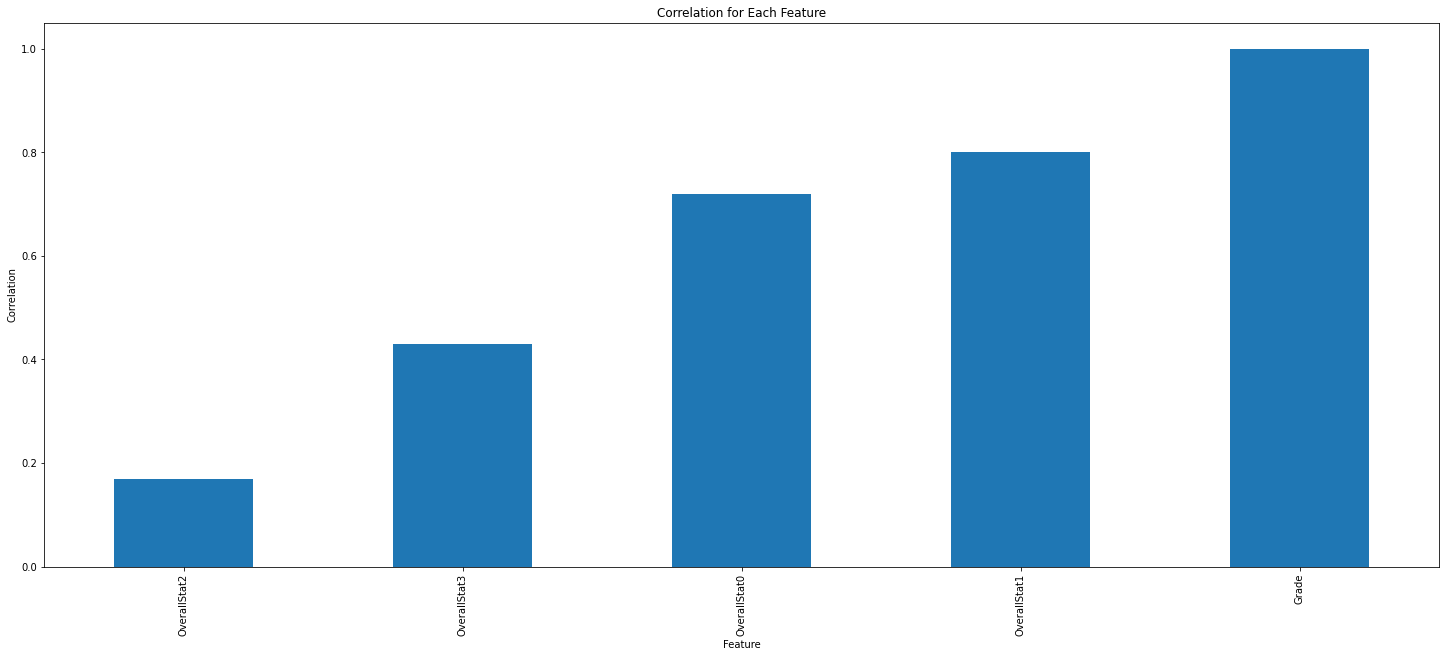

In [6]:
# replotting with less features
plt.clf()
std_plot = (std.corr()['Grade'].sort_values()).plot(kind="bar",figsize=(25,10))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation for Each Feature')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# X=std[['OverallStat', 'Week7_MP3', 'Week5_MP2', 'Week5_Stat2']]  # Features
X = std
y=std['Grade']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
#///////////////////////////// Logistic Regression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(x_train, y_train) #Training the model

#Test the model
y_pred = clf.predict(x_test)
print(y_pred)# printing predictions

print()# Printing new line

print(accuracy_score(y_test, y_pred))

#Check precision, recall, f1-score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[3 0 4 0 4 3 3 5 0 0 0 2 3 0 0 0 5 0 0 4 5 5 3 3 3 5 3 0 2 3 0 0 3]

0.6363636363636364
Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           2       0.00      0.00      0.00         3
           3       0.30      0.75      0.43         4
           4       0.33      0.12      0.18         8
           5       0.80      0.80      0.80         5

    accuracy                           0.64        33
   macro avg       0.49      0.53      0.48        33
weighted avg       0.63      0.64      0.61        33



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
